In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("../model_predictions.csv")
df

,y_test,Linear_Pred,Lasso_Pred,DecisionTree_Pred,RandomForest_Pred,Baseline_Pred
0,2.0,1.264820,1.679210,1.830500,1.411316,1.395712
1,1.0,0.133072,0.256947,0.262887,0.160406,0.199949
2,1.0,0.133072,0.246898,0.262887,0.160406,0.199949
3,1.0,0.133072,0.236848,0.262887,0.160406,0.199949
4,2.0,0.698946,0.932905,0.262887,0.608644,0.606259
...,...,...,...,...,...,...
382999,0.0,0.171066,0.268324,0.262887,0.306690,0.199949
383000,0.0,0.139446,0.134746,0.262887,0.202969,0.199949
383001,0.0,0.171066,0.258275,0.262887,0.286512,0.199949
383002,0.0,0.139446,0.160919,0.262887,0.173000,0.199949


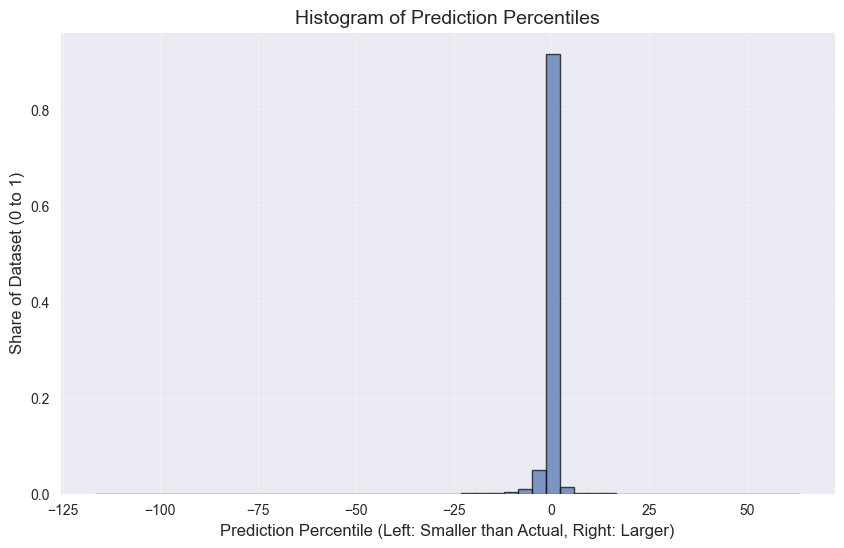

In [100]:
# First implementation for Linear Regression
predictions = df["Linear_Pred"]
actuals = df["y_test"]

# Calculate the prediction error
errors = predictions - actuals

# Convert errors to percentiles
percentiles = np.percentile(errors, np.linspace(0, 100, 100))

# Calculate the histogram
counts, bin_edges = np.histogram(errors, bins=50, density=True)

# Normalize counts to represent share of the dataset
normalized_counts = counts / np.sum(counts)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), align='edge', edgecolor='k', alpha=0.7)

# Customize the plot
plt.xlabel('Prediction Percentile (Left: Smaller than Actual, Right: Larger)', fontsize=12)
plt.ylabel('Share of Dataset (0 to 1)', fontsize=12)
plt.title('Histogram of Prediction Percentiles', fontsize=14)
plt.grid(alpha=0.3)

# Show the plot
plt.show()


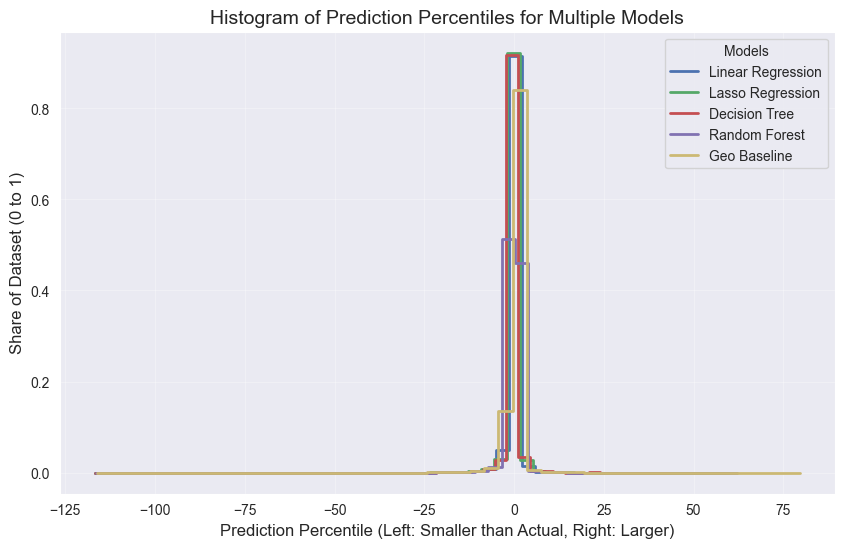

In [101]:
# Combined Histogram of all models

models_predictions = {
    "Linear Regression": df["Linear_Pred"],
    "Lasso Regression": df["Lasso_Pred"],
    "Decision Tree": df["DecisionTree_Pred"],
    "Random Forest": df["RandomForest_Pred"],
    "Geo Baseline": df["Baseline_Pred"]
}

actuals = df["y_test"]

# Plot setup
plt.figure(figsize=(10, 6))

# Loop over models and plot their histograms
for model_name, predictions in models_predictions.items():
    # Calculate the prediction error
    errors = predictions - actuals

    # Calculate the histogram
    counts, bin_edges = np.histogram(errors, bins=50, density=True)

    # Normalize counts to represent share of the dataset
    normalized_counts = counts / np.sum(counts)

    # Plot the histogram
    plt.step(bin_edges[:-1], normalized_counts, where='post', label=model_name, linewidth=2)

# Customize the plot
plt.xlabel('Prediction Percentile (Left: Smaller than Actual, Right: Larger)', fontsize=12)
plt.ylabel('Share of Dataset (0 to 1)', fontsize=12)
plt.title('Histogram of Prediction Percentiles for Multiple Models', fontsize=14)
plt.legend(title="Models")
plt.grid(alpha=0.3)

# Show the plot
plt.show()

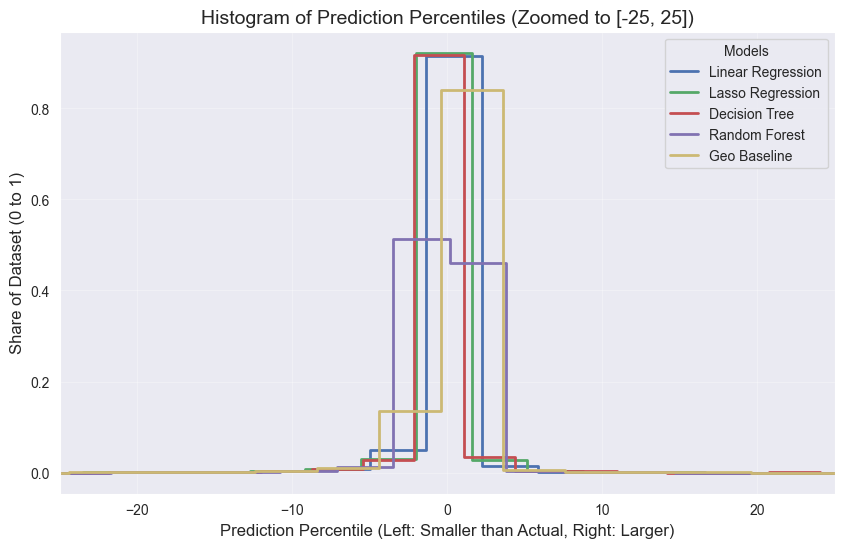

In [102]:
# Plot setup
plt.figure(figsize=(10, 6))

# Loop over models and plot their histograms
for model_name, predictions in models_predictions.items():
    # Calculate the prediction error
    errors = predictions - actuals

    # Calculate the histogram
    counts, bin_edges = np.histogram(errors, bins=50, density=True)

    # Normalize counts to represent share of the dataset
    normalized_counts = counts / np.sum(counts)

    # Plot the histogram
    plt.step(bin_edges[:-1], normalized_counts, where='post', label=model_name, linewidth=2)

# Zoom in by setting x-axis limits to [-25, 25]
plt.xlim(-25, 25)

# Customize the plot
plt.xlabel('Prediction Percentile (Left: Smaller than Actual, Right: Larger)', fontsize=12)
plt.ylabel('Share of Dataset (0 to 1)', fontsize=12)
plt.title('Histogram of Prediction Percentiles (Zoomed to [-25, 25])', fontsize=14)
plt.legend(title="Models")
plt.grid(alpha=0.3)

# Show the plot
plt.show()


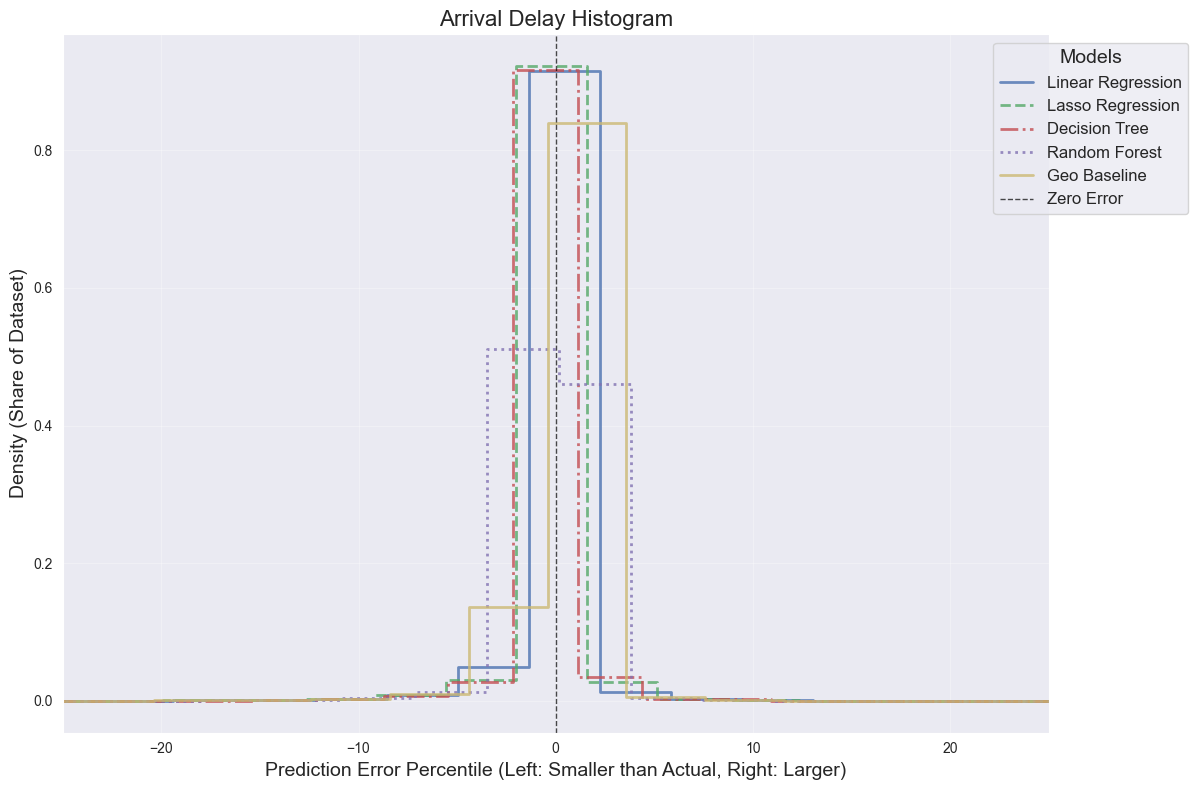

In [103]:
# Plot setup
plt.figure(figsize=(12, 8))

# Loop over models and plot their histograms with enhanced styles
line_styles = ['-', '--', '-.', ':', '-']  # Define a variety of line styles
for i, (model_name, predictions) in enumerate(models_predictions.items()):
    # Calculate the prediction error
    errors = predictions - actuals

    # Calculate the histogram
    counts, bin_edges = np.histogram(errors, bins=50, density=True)

    # Normalize counts to represent share of the dataset
    normalized_counts = counts / np.sum(counts)

    # Plot the histogram with a unique style for each model
    plt.step(bin_edges[:-1], normalized_counts, where='post',
             label=model_name, linewidth=2, linestyle=line_styles[i % len(line_styles)], alpha=0.8)

# Highlight the center (zero-error line)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=0.7, label="Zero Error")

# Zoom in by setting x-axis limits to [-25, 25]
plt.xlim(-25, 25)

# Customize the plot further
plt.xlabel('Prediction Error Percentile (Left: Smaller than Actual, Right: Larger)', fontsize=14)
plt.ylabel('Density (Share of Dataset)', fontsize=14)
plt.title('Arrival Delay Histogram', fontsize=16)
plt.legend(title="Models", fontsize=12, title_fontsize=14, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(alpha=0.3)

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig("unfilled_histogram_all_models.png", format='png', dpi=300)
# Show the plot
plt.show()

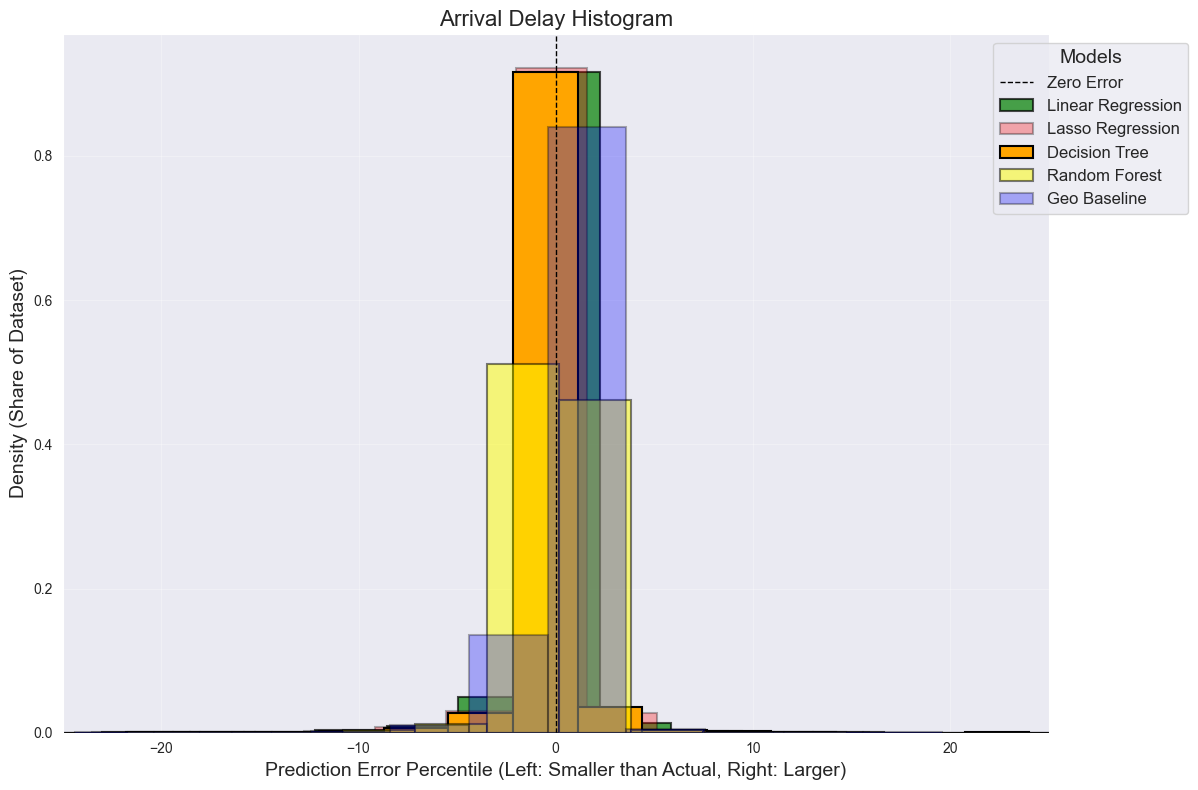

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Plot setup
plt.figure(figsize=(12, 8))

# Define a list of colors (one for each model)
colors = ['green', 'red', 'orange', 'yellow', 'blue']
alphas = [0.7,0.3,1,0.5,0.3]

# Loop over models and plot their histograms with enhanced styles
for i, (model_name, predictions) in enumerate(models_predictions.items()):
    """if model_name == "Linear Regression" or model_name == "Lasso Regression":
        continue"""
    # Calculate the prediction error
    errors = predictions - actuals

    # Calculate the histogram counts and bin edges
    counts, bin_edges = np.histogram(errors, bins=50)

    # Normalize counts manually (so area under curve sums to 1)
    normalized_counts = counts / np.sum(counts)

    # Plot the normalized histogram with a unique color for each model
    plt.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), align='edge', alpha=alphas[i],
            label=model_name, color=colors[i], edgecolor='black', linewidth=1.5)

# Highlight the center (zero-error line)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=1, label="Zero Error")

# Zoom in by setting x-axis limits to [-25, 25] without changing y-axis scaling
plt.xlim(-25, 25)

# Customize the plot further
plt.xlabel('Prediction Error Percentile (Left: Smaller than Actual, Right: Larger)', fontsize=14)
plt.ylabel('Density (Share of Dataset)', fontsize=14)
plt.title('Arrival Delay Histogram', fontsize=16)
plt.legend(title="Models", fontsize=12, title_fontsize=14, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(alpha=0.3)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig("histogram_all_models.png", format='png', dpi=300)

# Show the plot
plt.show()


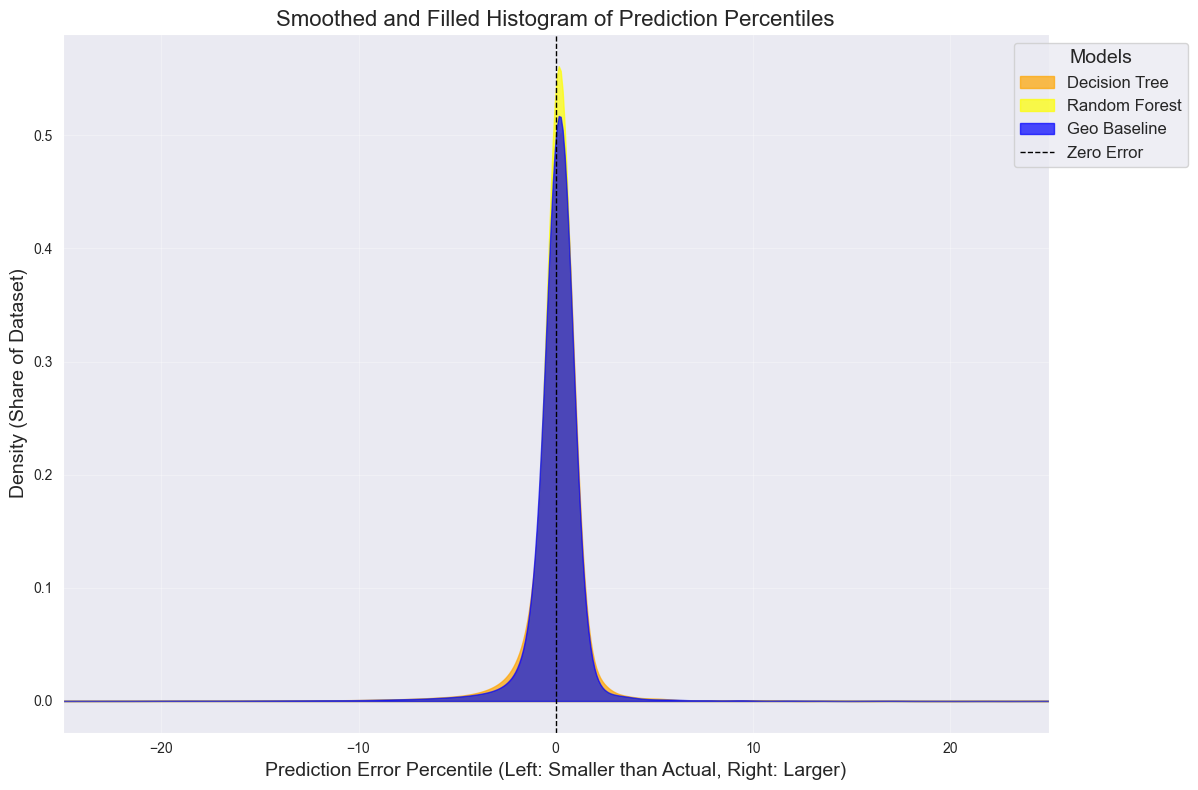

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Plot setup
plt.figure(figsize=(12, 8))

# Define a list of colors (one for each model)
colors = ['green', 'red', 'orange', 'yellow', 'blue']
alphas = [0.7, 0.3, 1, 0.5, 0.3]

# Loop over models and plot their KDE curves with enhanced styles
for i, (model_name, predictions) in enumerate(models_predictions.items()):
    if model_name == "Linear Regression" or model_name == "Lasso Regression":
        continue
    # Calculate the prediction error
    errors = predictions - actuals

    # Perform kernel density estimation (KDE) for smoothing
    kde = gaussian_kde(errors, bw_method=0.3)  # Adjust `bw_method` for smoother or sharper curves

    # Create a range of x values for the KDE curve
    x_values = np.linspace(-25, 25, 500)
    y_values = kde(x_values)  # Compute the KDE at each x value

    # Normalize y-values so the area under the curve sums to 1
    y_values /= np.sum(y_values) * (x_values[1] - x_values[0])

    # Fill the area under the KDE curve or not
    plt.fill_between(x_values, y_values, color=colors[i], alpha=0.7, label=model_name)    
    #plt.plot(x_values, y_values, color=colors[i], alpha=0.7, label=model_name)

# Highlight the center (zero-error line)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=1, label="Zero Error")

# Zoom in by setting x-axis limits to [-25, 25]
plt.xlim(-25, 25)

# Customize the plot further
plt.xlabel('Prediction Error Percentile (Left: Smaller than Actual, Right: Larger)', fontsize=14)
plt.ylabel('Density (Share of Dataset)', fontsize=14)
plt.title('Smoothed and Filled Histogram of Prediction Percentiles', fontsize=16)
plt.legend(title="Models", fontsize=12, title_fontsize=14, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(alpha=0.3)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig("smoothed_histogram_all_dt_rf_baseline.png", format='png', dpi=300)

# Show the plot
plt.show()


In [70]:
"""models_predictions = {
    "Linear Regression": df["Linear_Pred"],
    "Lasso Regression": df["Lasso_Pred"],
    "Decision Tree": df["DecisionTree_Pred"],
    "Random Forest": df["RandomForest_Pred"],
    "Geo Baseline": df["Baseline_Pred"]
}
"""

'models_predictions = {\n    "Linear Regression": df["Linear_Pred"],\n    "Lasso Regression": df["Lasso_Pred"],\n    "Decision Tree": df["DecisionTree_Pred"],\n    "Random Forest": df["RandomForest_Pred"],\n    "Geo Baseline": df["Baseline_Pred"]\n}\n'

In [94]:
complete_df = pd.read_csv("../final_result_df.csv")
complete_df

,Unnamed: 0,ID_Base,ID_Timestamp,stop_number,line,starting_station_IBNR,zip,last_station,IBNR,arrival_plan,...,departure_change,arrival_delay_m,departure_delay_m,info,canceled,info_present,transformed_info_message,clear_station_name,lat,long
0,2043731,-9222587613942629277,2407081000,1,RB4,8010126,7545,greiz,8010140.0,NaN,...,NaN,NaN,NaN,NaN,False,False,No message,greiz,NaN,NaN
1,2043732,-9222587613942629277,2407091000,1,RB4,8010126,7545,greiz,8010140.0,NaN,...,NaN,NaN,NaN,NaN,False,False,No message,greiz,NaN,NaN
2,2043733,-9222587613942629277,2407101000,1,RB4,8010126,7545,greiz,8010140.0,NaN,...,NaN,NaN,NaN,NaN,False,False,No message,greiz,NaN,NaN
3,2043734,-9222587613942629277,2407111000,1,RB4,8010126,7545,greiz,8010140.0,NaN,...,NaN,NaN,NaN,NaN,False,False,No message,greiz,NaN,NaN
4,2043735,-9222587613942629277,2407121000,1,RB4,8010126,7545,greiz,8010140.0,NaN,...,NaN,NaN,NaN,NaN,False,False,No message,greiz,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972312,440402,9221732241641229965,2407101114,12,RB20,8000596,77767,zusenhofen,8006678.0,NaN,...,NaN,NaN,NaN,NaN,False,False,No message,zusenhofen,48.54725,8.01675
972313,440414,9221732241641229965,2407111114,12,RB20,8000596,77767,zusenhofen,8006678.0,NaN,...,NaN,NaN,NaN,NaN,False,False,No message,zusenhofen,48.54725,8.01675
972314,440426,9221732241641229965,2407121114,12,RB20,8000596,77767,zusenhofen,8006678.0,NaN,...,NaN,NaN,NaN,NaN,False,False,No message,zusenhofen,48.54725,8.01675
972315,440438,9221732241641229965,2407131114,12,RB20,8000596,77767,zusenhofen,8006678.0,NaN,...,NaN,NaN,NaN,NaN,False,False,No message,zusenhofen,48.54725,8.01675


In [97]:
test = complete_df
test["ID"] = test["ID_Base"].astype(str)+test["ID_Timestamp"].astype(str)
test

,Unnamed: 0,ID_Base,ID_Timestamp,stop_number,line,starting_station_IBNR,zip,last_station,IBNR,arrival_plan,...,arrival_delay_m,departure_delay_m,info,canceled,info_present,transformed_info_message,clear_station_name,lat,long,ID
0,2043731,-9222587613942629277,2407081000,1,RB4,8010126,7545,greiz,8010140.0,NaN,...,NaN,NaN,NaN,False,False,No message,greiz,NaN,NaN,-92225876139426292772407081000
1,2043732,-9222587613942629277,2407091000,1,RB4,8010126,7545,greiz,8010140.0,NaN,...,NaN,NaN,NaN,False,False,No message,greiz,NaN,NaN,-92225876139426292772407091000
2,2043733,-9222587613942629277,2407101000,1,RB4,8010126,7545,greiz,8010140.0,NaN,...,NaN,NaN,NaN,False,False,No message,greiz,NaN,NaN,-92225876139426292772407101000
3,2043734,-9222587613942629277,2407111000,1,RB4,8010126,7545,greiz,8010140.0,NaN,...,NaN,NaN,NaN,False,False,No message,greiz,NaN,NaN,-92225876139426292772407111000
4,2043735,-9222587613942629277,2407121000,1,RB4,8010126,7545,greiz,8010140.0,NaN,...,NaN,NaN,NaN,False,False,No message,greiz,NaN,NaN,-92225876139426292772407121000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972312,440402,9221732241641229965,2407101114,12,RB20,8000596,77767,zusenhofen,8006678.0,NaN,...,NaN,NaN,NaN,False,False,No message,zusenhofen,48.54725,8.01675,92217322416412299652407101114
972313,440414,9221732241641229965,2407111114,12,RB20,8000596,77767,zusenhofen,8006678.0,NaN,...,NaN,NaN,NaN,False,False,No message,zusenhofen,48.54725,8.01675,92217322416412299652407111114
972314,440426,9221732241641229965,2407121114,12,RB20,8000596,77767,zusenhofen,8006678.0,NaN,...,NaN,NaN,NaN,False,False,No message,zusenhofen,48.54725,8.01675,92217322416412299652407121114
972315,440438,9221732241641229965,2407131114,12,RB20,8000596,77767,zusenhofen,8006678.0,NaN,...,NaN,NaN,NaN,False,False,No message,zusenhofen,48.54725,8.01675,92217322416412299652407131114


In [98]:
test_df = pd.read_csv("../DBtrainrides.csv")
test["Path"] = test_df["path"]
test

,Unnamed: 0,ID_Base,ID_Timestamp,stop_number,line,starting_station_IBNR,zip,last_station,IBNR,arrival_plan,...,departure_delay_m,info,canceled,info_present,transformed_info_message,clear_station_name,lat,long,ID,Path
0,2043731,-9222587613942629277,2407081000,1,RB4,8010126,7545,greiz,8010140.0,NaN,...,NaN,NaN,False,False,No message,greiz,NaN,NaN,-92225876139426292772407081000,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...
1,2043732,-9222587613942629277,2407091000,1,RB4,8010126,7545,greiz,8010140.0,NaN,...,NaN,NaN,False,False,No message,greiz,NaN,NaN,-92225876139426292772407091000,NaN
2,2043733,-9222587613942629277,2407101000,1,RB4,8010126,7545,greiz,8010140.0,NaN,...,NaN,NaN,False,False,No message,greiz,NaN,NaN,-92225876139426292772407101000,Hamm(Westf)Hbf|Kamen|Kamen-Methler|Dortmund-Ku...
3,2043734,-9222587613942629277,2407111000,1,RB4,8010126,7545,greiz,8010140.0,NaN,...,NaN,NaN,False,False,No message,greiz,NaN,NaN,-92225876139426292772407111000,Aachen Hbf
4,2043735,-9222587613942629277,2407121000,1,RB4,8010126,7545,greiz,8010140.0,NaN,...,NaN,NaN,False,False,No message,greiz,NaN,NaN,-92225876139426292772407121000,Herzogenrath|Kohlscheid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972312,440402,9221732241641229965,2407101114,12,RB20,8000596,77767,zusenhofen,8006678.0,NaN,...,NaN,NaN,False,False,No message,zusenhofen,48.54725,8.01675,92217322416412299652407101114,Kaiserslautern Hbf|Enkenbach|Münchweiler(Alsen...
972313,440414,9221732241641229965,2407111114,12,RB20,8000596,77767,zusenhofen,8006678.0,NaN,...,NaN,NaN,False,False,No message,zusenhofen,48.54725,8.01675,92217322416412299652407111114,Bingen(Rhein) Hbf|Münster-Sarmsheim|Laubenheim...
972314,440426,9221732241641229965,2407121114,12,RB20,8000596,77767,zusenhofen,8006678.0,NaN,...,NaN,NaN,False,False,No message,zusenhofen,48.54725,8.01675,92217322416412299652407121114,Bad Soden-Salmünster|Wächtersbach|Wirtheim|Hai...
972315,440438,9221732241641229965,2407131114,12,RB20,8000596,77767,zusenhofen,8006678.0,NaN,...,NaN,NaN,False,False,No message,zusenhofen,48.54725,8.01675,92217322416412299652407131114,Wächtersbach|Wirtheim|Haitz-Höchst|Gelnhausen|...
